In [113]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import sys
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from xgboost import xgboost #not installed
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [114]:
# load the data
df = pd.read_csv('./dataset/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [116]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [117]:
 # check the missing values percentage
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

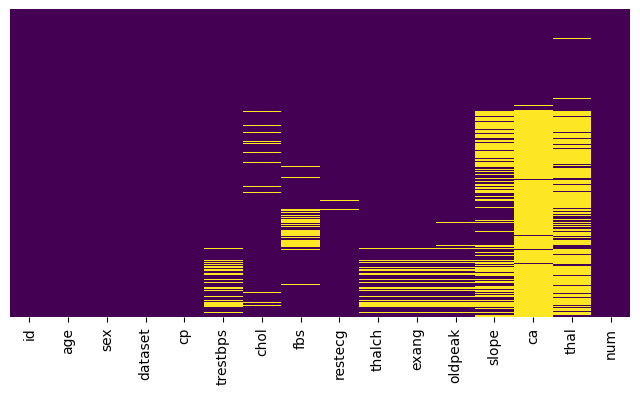

In [118]:
# plot the missing values 
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [119]:
# imputing missing values using sklearn SimpleImputer
from sklearn.impute import SimpleImputer
# select columns to impute
cols = ['fbs', 'exang', 'restecg','ca', 'slope', 'oldpeak', 'trestbps', 'thalch', 'chol', ]
# imputing missing values
imp = SimpleImputer(strategy='most_frequent')
df[cols] = imp.fit_transform(df[cols])

In [120]:
 # check the missing values percentage
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

thal        52.83
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     0.00
chol         0.00
fbs          0.00
restecg      0.00
thalch       0.00
exang        0.00
oldpeak      0.00
slope        0.00
ca           0.00
num          0.00
dtype: float64

### Imputing missing values in THAL column

In [121]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [122]:
df['slope'].value_counts()

slope
flat           654
upsloping      203
downsloping     63
Name: count, dtype: int64

In [123]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [146]:
# drop all missing values
df_01 = df.dropna()
df_01.shape

(434, 16)

In [125]:
df_01.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [126]:
df_01.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [127]:
# feature and target
X = df_01.drop(columns='thal', axis=1)
y = df_01['thal']
# encode the categorical feature using label encoder
le = LabelEncoder()
# use for loop for encoding all categorical features
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model building Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00        12
           normal       0.76      0.82      0.79        34
reversable defect       0.72      0.88      0.79        41

         accuracy                           0.74        87
        macro avg       0.49      0.57      0.53        87
     weighted avg       0.64      0.74      0.68        87



In [128]:
# select the only data having missing values in thal column
df_02 = df[df['thal'].isnull()]
df_02.shape

(486, 16)

In [129]:
df_02.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,88,53,Female,Cleveland,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,upsloping,0.0,NaN,0
266,267,52,Male,Cleveland,asymptomatic,128.0,204.0,True,normal,156.0,True,1.0,flat,0.0,NaN,2
303,304,28,Male,Cleveland,atypical angina,130.0,132.0,False,lv hypertrophy,185.0,False,0.0,flat,0.0,NaN,0
304,305,29,Male,Hungary,atypical angina,120.0,243.0,False,normal,160.0,False,0.0,flat,0.0,NaN,0
305,306,29,Male,Hungary,atypical angina,140.0,0.0,False,normal,170.0,False,0.0,flat,0.0,NaN,0


In [130]:
round(df_02.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

thal        52.83
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
trestbps     0.00
chol         0.00
fbs          0.00
restecg      0.00
thalch       0.00
exang        0.00
oldpeak      0.00
slope        0.00
ca           0.00
num          0.00
dtype: float64

In [131]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 87 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        486 non-null    int64 
 1   age       486 non-null    int64 
 2   sex       486 non-null    object
 3   dataset   486 non-null    object
 4   cp        486 non-null    object
 5   trestbps  486 non-null    object
 6   chol      486 non-null    object
 7   fbs       486 non-null    object
 8   restecg   486 non-null    object
 9   thalch    486 non-null    object
 10  exang     486 non-null    object
 11  oldpeak   486 non-null    object
 12  slope     486 non-null    object
 13  ca        486 non-null    object
 14  thal      0 non-null      object
 15  num       486 non-null    int64 
dtypes: int64(3), object(13)
memory usage: 64.5+ KB


In [132]:
# encoding the categorical features using label encoding
le = LabelEncoder()
# use for loop for label encoding
for col in df_02.columns:
    if df_02[col].dtypes=='object' or df_02[col].dtypes == 'category':
        df_02[col] = le.fit_transform(df_02[col])



In [148]:
x = df_02.drop(columns='thal', axis=1)
x.head()
df_02.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,88,53,0,0,2,25,54,0,0,30,0,9,2,0,normal,0
266,267,52,1,0,0,25,43,1,1,69,1,18,1,0,reversable defect,2
303,304,28,1,0,1,26,5,0,0,91,0,9,1,0,normal,0
304,305,29,1,1,1,19,79,0,1,73,0,9,1,0,normal,0
305,306,29,1,1,1,32,0,0,1,81,0,9,1,0,normal,0


In [150]:
# impute thal column using random forest model 
df_02['thal'] = rf.predict(x)
df_02.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,88,53,0,0,2,25,54,0,0,30,0,9,2,0,normal,0
266,267,52,1,0,0,25,43,1,1,69,1,18,1,0,reversable defect,2
303,304,28,1,0,1,26,5,0,0,91,0,9,1,0,normal,0
304,305,29,1,1,1,19,79,0,1,73,0,9,1,0,normal,0
305,306,29,1,1,1,32,0,0,1,81,0,9,1,0,normal,0


In [151]:
df_02.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [152]:
df_03 = pd.concat([df_01, df_02])
df_03.shape

(920, 16)

In [140]:
round(df_03.isnull().sum()/len(df_03)*100,2).sort_values(ascending=False)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [142]:
df_03['thal'].value_counts()

thal
reversable defect    516
normal               334
fixed defect          70
Name: count, dtype: int64

In [144]:
df_03.duplicated().sum()

0

In [145]:
df_03.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [153]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        920 non-null    int64 
 1   age       920 non-null    int64 
 2   sex       920 non-null    object
 3   dataset   920 non-null    object
 4   cp        920 non-null    object
 5   trestbps  920 non-null    object
 6   chol      920 non-null    object
 7   fbs       920 non-null    object
 8   restecg   920 non-null    object
 9   thalch    920 non-null    object
 10  exang     920 non-null    object
 11  oldpeak   920 non-null    object
 12  slope     920 non-null    object
 13  ca        920 non-null    object
 14  thal      920 non-null    object
 15  num       920 non-null    int64 
dtypes: int64(3), object(13)
memory usage: 122.2+ KB
